In [24]:
# Dependencies
import requests
import pandas as pd
import time
import gmaps
import gmaps.geojson_geometries
import gmaps.datasets
from IPython.display import Image
from matplotlib import pyplot as plt
from datetime import datetime
from pprint import pprint
from config import (news_api, gkey)

In [2]:
protest_df = pd.read_csv('Resources/protests.csv')
protest_df

,Date,Location,Attendees,Event (legacy; see tags),Tags,Curated,Source,Total Articles
0,2017-01-15,"Bowie State University, Bowie, MD",1500.0,Healthcare,Healthcare; For Affordable Care Act,Yes,http://www.capitalgazette.com/news/ph-ac-cn-ac...,1
1,2017-01-16,"Johnson City, TN",300.0,Civil Rights,Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.johnsoncitypress.com/Local/2017/01/...,4
2,2017-01-16,"Indianapolis, IN",20.0,Environment,Environment; For wilderness preservation,Yes,http://wishtv.com/2017/01/16/nature-groups-pro...,1
3,2017-01-16,"Cincinnati, OH",NaN,Other (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.cincinnati.com/picture-gallery/news...,1
4,2017-01-18,"Hartford, CT",300.0,Healthcare (Pro-Planned Parenthood),Healthcare; For Planned Parenthood,Yes,http://www.realhartford.org/2017/01/19/reprodu...,1
...,...,...,...,...,...,...,...,...
32518,2020-08-19,"State Capitol, Hartford, CT",20.0,Education,Education; Healthcare; Against hazardous condi...,Yes,https://www.courant.com/coronavirus/hc-news-co...,3
32519,2020-08-19,"Summit Middle School, Summit, NJ",20.0,Education,Education; Healthcare; Against hazardous condi...,Yes,https://www.nj.com/education/2020/08/teachers-...,1
32520,2020-08-19,"East Orange, NJ",100.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.pix11.com/news/local-news/nj-stude...,1
32521,2020-08-19,"Gloucester, MA",NaN,Education,Education; Healthcare; Against hazardous condi...,Yes,https://www.gloucestertimes.com/news/local_new...,1


In [3]:
protest_df['Attendees'] = protest_df['Attendees'].fillna(0)
filter_df = protest_df.loc[protest_df['Event (legacy; see tags)'].str.contains('Racial Injustice')].reset_index(drop=True)
filter_df

,Date,Location,Attendees,Event (legacy; see tags),Tags,Curated,Source,Total Articles
0,2017-01-20,"University of Washington, Seattle, WA",0.0,Racial Injustice,Civil Rights; For racial justice; Against invi...,Yes,http://komonews.com/news/local/woman-says-she-...,2
1,2017-01-26,"Ped Mall, Iowa City, IA",30.0,Racial Injustice,Civil Rights; For racial justice,Yes,http://fox59.com/2017/01/30/fedex-backs-driver...,1
2,2017-02-07,"Lebanon Valley College, Annville, PA",50.0,Racial Injustice,Civil Rights; For racial justice,Yes,http://abc27.com/2017/02/07/protestors-push-fo...,1
3,2017-02-09,"University of Michigan, Ann Arbor, MI",150.0,Racial Injustice,Civil Rights; For racial justice; For religiou...,Yes,https://www.michigandaily.com/section/news/stu...,1
4,2017-02-13,"Charlottesville, VA",0.0,Racial Injustice,Civil Rights; For racial justice; Against Conf...,Yes,http://www.wcyb.com/news/politics/va-gubernato...,1
...,...,...,...,...,...,...,...,...
8563,2020-08-18,"East Liberty, Pittsburgh, PA",300.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.wtae.com/article/watch-live-protes...,5
8564,2020-08-18,"Portland, OR",200.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://apnews.com/d640afdd85404f0b7ffde44eb75...,7
8565,2020-08-19,"Rock County Courthouse, Janesville, WI",15.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.gazettextra.com/news/local/residen...,1
8566,2020-08-19,"East Orange, NJ",100.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.pix11.com/news/local-news/nj-stude...,1


In [4]:
filter_df['state'] = ''
for index, row in filter_df.iterrows():
    try:
        filter_df.loc[index, 'state'] = row['Location'].rsplit(',', 1)[1]
    except:
        print(f"Issue with {row['Location']}")
filter_df

Issue with La Porte County Courthouse in La Porte


,Date,Location,Attendees,Event (legacy; see tags),Tags,Curated,Source,Total Articles,state
0,2017-01-20,"University of Washington, Seattle, WA",0.0,Racial Injustice,Civil Rights; For racial justice; Against invi...,Yes,http://komonews.com/news/local/woman-says-she-...,2,WA
1,2017-01-26,"Ped Mall, Iowa City, IA",30.0,Racial Injustice,Civil Rights; For racial justice,Yes,http://fox59.com/2017/01/30/fedex-backs-driver...,1,IA
2,2017-02-07,"Lebanon Valley College, Annville, PA",50.0,Racial Injustice,Civil Rights; For racial justice,Yes,http://abc27.com/2017/02/07/protestors-push-fo...,1,PA
3,2017-02-09,"University of Michigan, Ann Arbor, MI",150.0,Racial Injustice,Civil Rights; For racial justice; For religiou...,Yes,https://www.michigandaily.com/section/news/stu...,1,MI
4,2017-02-13,"Charlottesville, VA",0.0,Racial Injustice,Civil Rights; For racial justice; Against Conf...,Yes,http://www.wcyb.com/news/politics/va-gubernato...,1,VA
...,...,...,...,...,...,...,...,...,...
8563,2020-08-18,"East Liberty, Pittsburgh, PA",300.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.wtae.com/article/watch-live-protes...,5,PA
8564,2020-08-18,"Portland, OR",200.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://apnews.com/d640afdd85404f0b7ffde44eb75...,7,OR
8565,2020-08-19,"Rock County Courthouse, Janesville, WI",15.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.gazettextra.com/news/local/residen...,1,WI
8566,2020-08-19,"East Orange, NJ",100.0,Racial Injustice,Civil Rights; For racial justice; For greater ...,Yes,https://www.pix11.com/news/local-news/nj-stude...,1,NJ


In [5]:
filter_df['state'] = filter_df['state'].str.replace("  ","")
filter_df['state'] = filter_df['state'].str.replace(" ","")

In [6]:
clean_df = filter_df.dropna(how='any').reset_index(drop=True)
state_protest = clean_df.groupby('state')[['Attendees']].sum().reset_index()
state_protest.head()

,state,Attendees
0,,100.0
1,AK,4448.0
2,AL,9646.0
3,AR,4909.0
4,AZ,26149.0


In [7]:
state_protest['state_name'] = ''
len(state_protest)

55

In [8]:
# Match state abbrviation to state name dict
abb = dict(eval(open('Resources/us_state_abbrev.py').read()))

for index, row in state_protest.iterrows():
    try:
        state_name = [key for key, value in abb.items() if row['state'] == value]
        state_protest.loc[index, 'state_name'] = state_name
    except:
        print(f"Error with {row['state']}")

state_protest.head()

Error with 
Error with Fl
Error with Mi
Error with PR


,state,Attendees,state_name
0,,100.0,
1,AK,4448.0,Alaska
2,AL,9646.0,Alabama
3,AR,4909.0,Arkansas
4,AZ,26149.0,Arizona


In [11]:
# google search locations to obtain lat and lng of states (used initially for heatmap)
state_protest['lat'] = ''
state_protest['lng'] = ''

params = {"key": gkey}
base_url = "https://maps.googleapis.com/maps/api/geocode/json"

for index, row in state_protest.iterrows():
    params['address'] = f"{row['state_name']},US"
    
    lat_lng = requests.get(base_url, params=params).json()
    try:
        state_protest.loc[index, 'lat'] = lat_lng['results'][0]['geometry']['location']['lat']
        state_protest.loc[index, 'lng'] = lat_lng['results'][0]['geometry']['location']['lng']
    except:
        print(f"{row['state_name']} could not be found")


In [12]:
# export to csv for future use
# state_protest.to_csv('Output/state_protest.csv', index=False)

In [16]:
# import from Output folder
state_protest = pd.read_csv('Output/state_protest.csv')

In [17]:
state_protest.head()

,state,Attendees,state_name,lat,lng
0,NaN,100.0,NaN,37.090240,-95.712891
1,AK,4448.0,Alaska,64.200841,-149.493673
2,AL,9646.0,Alabama,32.318231,-86.902298
3,AR,4909.0,Arkansas,35.201050,-91.831833
4,AZ,26149.0,Arizona,34.048928,-111.093731


In [19]:
gmaps.geojson_geometries.list_geometries()
state_geojson = gmaps.geojson_geometries.load_geometry('us-states')

In [21]:
colors = []
for feature in state_geojson['features']:
    state_name = feature['properties']['NAME']
    for index, row in state_protest.iterrows():
        if (state_name == row['state_name']) & (row['Attendees'] > 40000):
            color= (255, 0, 0 , 0.6)
        elif (state_name == row['state_name']) & (row['Attendees'] > 25000):
            color= (255, 165, 0 , 0.6)
        elif (state_name == row['state_name']) & (row['Attendees'] > 10000):
            color= (255, 255, 0 , 0.6)
        elif (state_name == row['state_name']) & (row['Attendees'] <= 10000):
            color= (60, 179, 113 , 0.6)
    colors.append(color) 
# print(colors)

In [23]:
gmaps.configure(api_key=gkey)
fig = gmaps.figure()
gini_layer = gmaps.geojson_layer(
    state_geojson,
    fill_color=colors,
    stroke_color=colors,
    fill_opacity=1)
fig.add_layer(gini_layer)
fig

Figure(layout=FigureLayout(height='420px'))

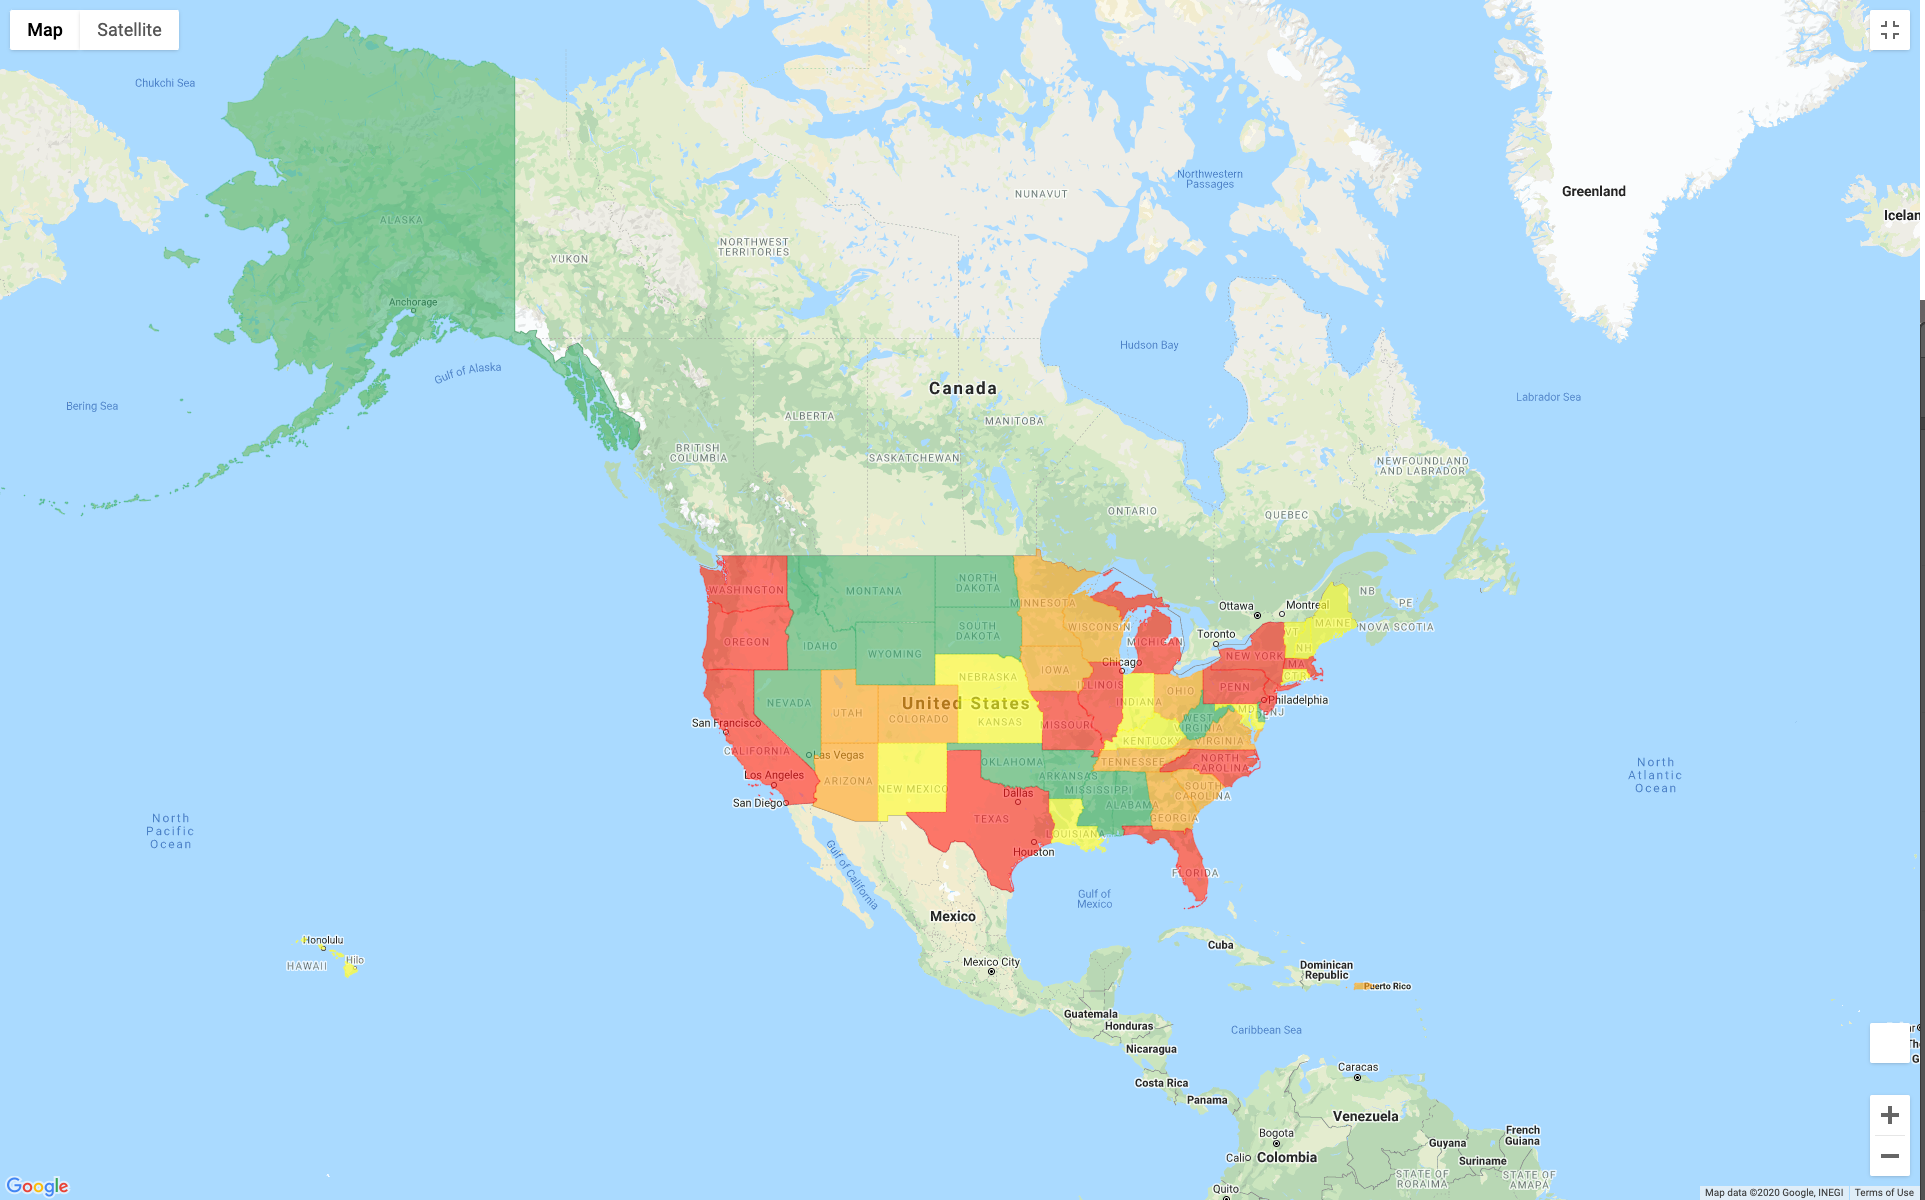

In [25]:
Image(filename='Images/State_protest.png', width=900, height=500)